# Calcular la distancia euclidiana

In [135]:
import pandas as pd
import numpy as np

In [136]:
# Cargamos nuestro Data Frame
df = pd.read_csv('ganaderia.csv')
df.head()

,Código Ámbito,Ámbito,Código área,Área,Código Elemento,Elemento,Código Producto,Producto,Código año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo
0,QA,Ganadería,3,Albania,5111,Existencias,1107,Asnos,2018,2018,Cabeza,56000.0,*,Cifras no oficiales
1,QA,Ganadería,3,Albania,5111,Existencias,946,Búfalos,2018,2018,Cabeza,95.0,Im,Datos de FAO basados en una metodología de imp...
2,QA,Ganadería,3,Albania,5111,Existencias,1096,Caballos,2018,2018,Cabeza,31905.0,NaN,Datos oficiales
3,QA,Ganadería,3,Albania,5111,Existencias,1016,Caprinos,2018,2018,Cabeza,917155.0,NaN,Datos oficiales
4,QA,Ganadería,3,Albania,5111,Existencias,1034,Cerdos,2018,2018,Cabeza,184133.0,NaN,Datos oficiales


In [137]:
#df.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
#df.head(10)

In [149]:
topa = df.loc[:,['Área','Producto','Valor']]
topa.head()

,Área,Producto,Valor
0,Albania,Asnos,56000.0
1,Albania,Búfalos,95.0
2,Albania,Caballos,31905.0
3,Albania,Caprinos,917155.0
4,Albania,Cerdos,184133.0


In [139]:
table = pd.pivot_table(topa,index = ['Área'],columns =['Producto'],values = 'Valor')

In [150]:
# Eliminamos los datos nulos o los rellenamos con la media
table = table.fillna(value = 0)
table.sort_index(inplace = True)
table.head()

Producto,Asnos,Búfalos,Caballos,Camellos,Caprinos,Cerdos,Colmenas,Conejos y liebres,Gallinas,Ganado vacuno,Gansos y pintadas,Mulas,Ovinos,Palomas y otras aves,Patos,Pavos
Área,,,,,,,,,,,,,,,,
Albania,56000.0,95.0,31905.0,0.0,917155.0,184133.0,285455.0,0.0,7272.0,467318.0,0.0,0.0,1863837.0,0.0,0.0,403.0
Alemania,0.0,9613.0,406269.0,0.0,146000.0,26445400.0,677014.0,57.0,157813.0,11949092.0,306.0,0.0,1569900.0,0.0,2811.0,13399.0
Argentina,99604.0,0.0,2611240.0,0.0,4567479.0,5648637.0,3020370.0,1173.0,113600.0,53928990.0,172.0,185736.0,14339908.0,0.0,2588.0,3014.0
Austria,0.0,0.0,92979.0,0.0,91134.0,2820082.0,372900.0,204.0,16887.0,1943476.0,28.0,0.0,401480.0,0.0,57.0,593.0
Brasil,822255.0,1390066.0,5751798.0,0.0,10696664.0,41443594.0,1017506.0,166.0,1468352.0,213523056.0,0.0,1252029.0,18948934.0,0.0,3467.0,33781.0


In [141]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def_sc = pd.DataFrame(scaler.fit_transform(table))
def_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.347003,-0.323041,-0.652213,-0.301511,-0.322333,-0.368444,-0.473605,-0.315682,-0.411895,-0.535849,-0.307183,-0.484584,-0.384042,-0.301511,-0.308536,-0.552927
1,-0.422091,-0.321765,-0.436700,-0.301511,-0.342690,-0.152905,-0.314604,-0.314773,-0.310567,-0.339234,-0.303632,-0.484584,-0.390694,-0.301511,-0.293825,0.626965
2,-0.288536,-0.323054,0.832654,-0.301511,-0.225975,-0.323594,0.636970,-0.296984,-0.340326,0.379637,-0.305187,-0.009023,-0.101690,-0.301511,-0.294992,-0.315877
3,-0.422091,-0.323054,-0.617054,-0.301511,-0.344138,-0.346810,-0.438096,-0.312430,-0.405423,-0.510571,-0.306858,-0.484584,-0.417138,-0.301511,-0.308238,-0.535677
4,0.680441,-0.136718,2.640606,-0.301511,-0.064181,-0.029807,-0.176339,-0.313036,0.571547,3.112551,-0.307183,2.721128,0.002619,-0.301511,-0.290392,2.477422


In [142]:
# Generamos una muestra aleatoria 
muestra = def_sc.sample(n=12,random_state = 198)
# Ordenamos e dataframe 
"""PENDIENTE : AGREGAR LAS OBSERVACIONES Y CARACTERISTICAS"""
muestra.sort_index(inplace = True)
muestra.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.347003,-0.323041,-0.652213,-0.301511,-0.322333,-0.368444,-0.473605,-0.315682,-0.411895,-0.535849,-0.307183,-0.484584,-0.384042,-0.301511,-0.308536,-0.552927
1,-0.422091,-0.321765,-0.436700,-0.301511,-0.342690,-0.152905,-0.314604,-0.314773,-0.310567,-0.339234,-0.303632,-0.484584,-0.390694,-0.301511,-0.293825,0.626965
2,-0.288536,-0.323054,0.832654,-0.301511,-0.225975,-0.323594,0.636970,-0.296984,-0.340326,0.379637,-0.305187,-0.009023,-0.101690,-0.301511,-0.294992,-0.315877
3,-0.422091,-0.323054,-0.617054,-0.301511,-0.344138,-0.346810,-0.438096,-0.312430,-0.405423,-0.510571,-0.306858,-0.484584,-0.417138,-0.301511,-0.308238,-0.535677
4,0.680441,-0.136718,2.640606,-0.301511,-0.064181,-0.029807,-0.176339,-0.313036,0.571547,3.112551,-0.307183,2.721128,0.002619,-0.301511,-0.290392,2.477422


In [151]:
def euclideanDist(df):
    dist_v= []
    for i in range(12):
        for j in range(12):
            #obtenemos un vector(observaciones)
            vector1= df.loc[i,0:11]
            vector2= df.loc[j,0:11]
            dist_v.append(np.sqrt(numpy.sum((vector1-vector2)**2)))
    return dist_v

In [152]:
dist = euclideanDist(muestra)
dist = np.array(dist)
dist = dist.reshape(12,12)

In [153]:
dist= pd.DataFrame(dist)

In [154]:
#Distancia euclidiana entre las 12 primera observaciones y las 12 primeras caracteristicas
dist.head(12)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.416146,2.126658,0.098845,6.062779,11.269264,0.278358,0.281754,0.593696,0.120342,0.060986,0.317671
1,0.416146,0.000000,1.822495,0.351783,5.813865,11.093835,0.246888,0.352517,0.461615,0.414465,0.411779,0.237639
2,2.126658,1.822495,0.000000,2.076745,4.557478,10.565129,1.930409,1.992014,1.708249,2.138849,2.137451,1.841435
3,0.098845,0.351783,2.076745,0.000000,6.038884,11.269967,0.232591,0.262906,0.547096,0.115669,0.095770,0.256745
4,6.062779,5.813865,4.557478,6.038884,0.000000,10.365814,5.880406,5.850533,5.913856,6.048884,6.053647,5.835419
5,11.269264,11.093835,10.565129,11.269967,10.365814,0.000000,11.124249,11.261531,11.019796,11.313875,11.291417,11.205362
6,0.278358,0.246888,1.930409,0.232591,5.880406,11.124249,0.000000,0.251009,0.515495,0.266380,0.270645,0.198583
7,0.281754,0.352517,1.992014,0.262906,5.850533,11.261531,0.251009,0.000000,0.670692,0.235287,0.248726,0.225272
8,0.593696,0.461615,1.708249,0.547096,5.913856,11.019796,0.515495,0.670692,0.000000,0.652679,0.628438,0.464903
9,0.120342,0.414465,2.138849,0.115669,6.048884,11.313875,0.266380,0.235287,0.652679,0.000000,0.066637,0.311234


### Cálculo de distancias para datos mixtos 

In [166]:
from scipy.spatial.distance import pdist
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
dist = pdist(muestra)

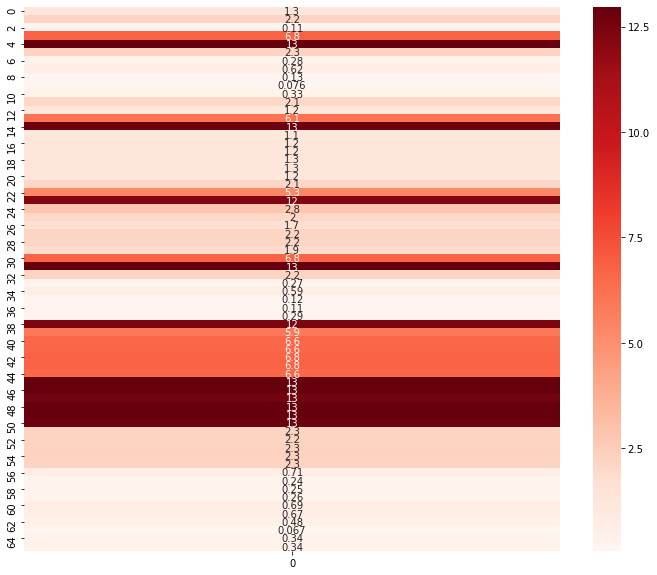

In [175]:
plt.figure(figsize=(12,10))
sns.heatmap(dist[:, np.newaxis], annot=True, cmap=plt.cm.Reds)
plt.show()